# LEAD SCORE CASE STUDY 

## Goals of the Case Study
    There are quite a few goals for this case study.

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
 
 
2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

## Step 1: Reading and Understanding the Data
Let's start with the following steps:

1. Importing required libraries
2. Importing data using the pandas library
3. Understanding the structure of the data

In [1]:
# 1.Importing data using the pandas library

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore') # to Supress Warnings

pd.set_option('display.max_rows', None) # to show maximum rows
pd.set_option('display.max_columns', None) # to show maximum columns

import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# 2. Importing data using the pandas library

lead = pd.read_csv('Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# 3. Understanding the structure of the data
lead.shape

(9240, 37)

In [4]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
round(lead.isnull().sum() * 100 / len(lead), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [6]:
lead.describe(percentiles=[.25, .50, .75, .90, .95, .99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000,16.000000,19.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000,17.000000,20.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000,17.000000,20.000000


## Step 2 : Data Cleaning

1. Handle the “Select” level that is present in many of the categorical variables.
2. Drop columns that are having high percentage of missing values. Check all the columns before dropping them.
3. Check the number of unique categories in each categorical column. Here you may need to do something.
4. For the columns with less percentage of missing, use some imputation technique.
5. check the percentage of rows retained in data cleaning process.
6. Finding Outliers and treating them

In [7]:
lead['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [8]:
lead.replace(to_replace ="Select",   # Handling the “Select” level
                 value = np.nan,   
                 inplace = True)

In [9]:
lead['How did you hear about X Education'].value_counts()

Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64

In [10]:
round(lead.isna().mean() * 100, 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
# Dropping the columns that are having above 40% percent of missing values
lead = lead.loc[:, lead.isna().mean()*100 <= 40]

In [12]:
lead.shape

(9240, 30)

In [13]:
lead.isnull().mean() * 100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [14]:
# Checking columns having null values and Handling it
lead['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [15]:
lead['Country']= lead['Country'].fillna(lead['Country'].mode()[0])

In [16]:
lead['Country'].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

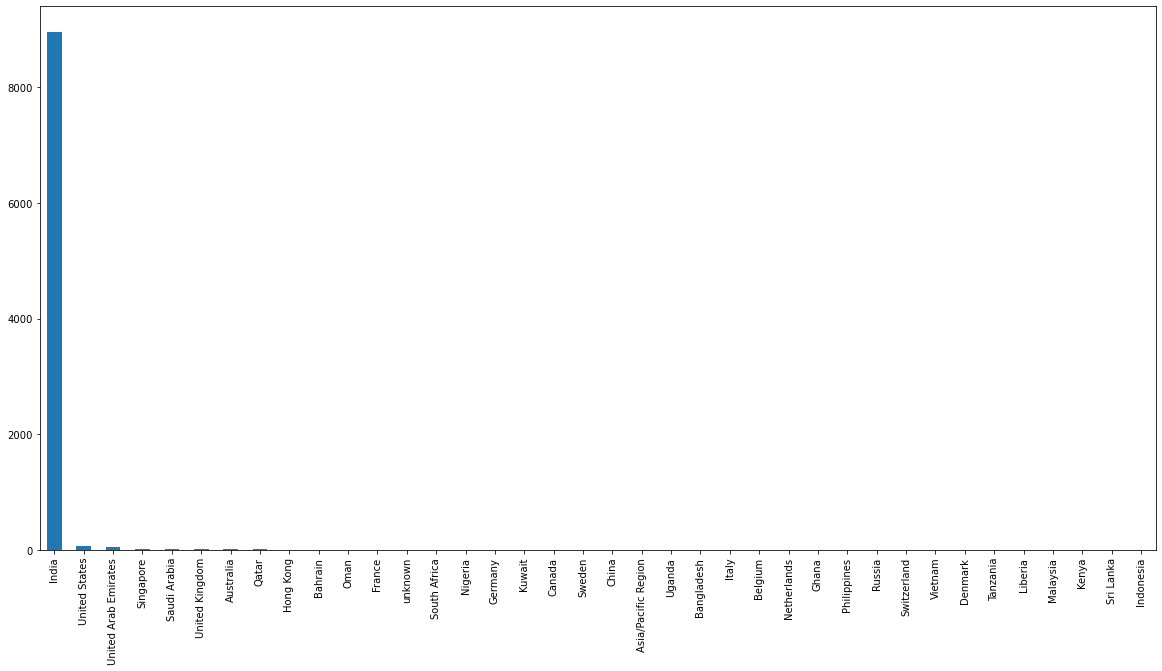

In [17]:
plt.figure(figsize=[20, 10])
lead['Country'].value_counts().plot.bar()
plt.show()

**Majority of the leads came from india as compared to other countries so that intially we can take this column as india so its better to drop the country column for avoiding complexity**

In [18]:
lead.drop(['Country'], axis = 1, inplace = True) # dropping country column

In [19]:
lead.isnull().mean() * 100 # crosscheck nulls

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [20]:
lead.Specialization.value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [21]:
# Specialization column having 36% nan values
# so that dropping null values will leads to loss of data hence replacing null values with NOT MENTIONED
lead['Specialization']=lead['Specialization'].replace(np.nan, 'NOT MENTIONED')

In [22]:
# replacing management studies to management
lead['Specialization'] = lead['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                            'Healthcare Management','Hospitality Management',
                                                         'Retail Management'] ,'Management')

In [23]:
# replacing Business studies to business
lead['Specialization']=lead['Specialization'].replace(['Business Administration',
                                                       'International Business',
                                                       'Rural and Agribusiness',
                                                              'E-Business'] ,'Business')

In [24]:
lead.Specialization.value_counts(dropna=False)

Management                           4253
NOT MENTIONED                        3380
Business                              711
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
E-COMMERCE                            112
Services Excellence                    40
Name: Specialization, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'NOT MENTIONED'),
  Text(1, 0, 'Business'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Management'),
  Text(4, 0, 'Travel and Tourism'),
  Text(5, 0, 'Banking, Investment And Insurance'),
  Text(6, 0, 'E-COMMERCE'),
  Text(7, 0, 'Services Excellence')])

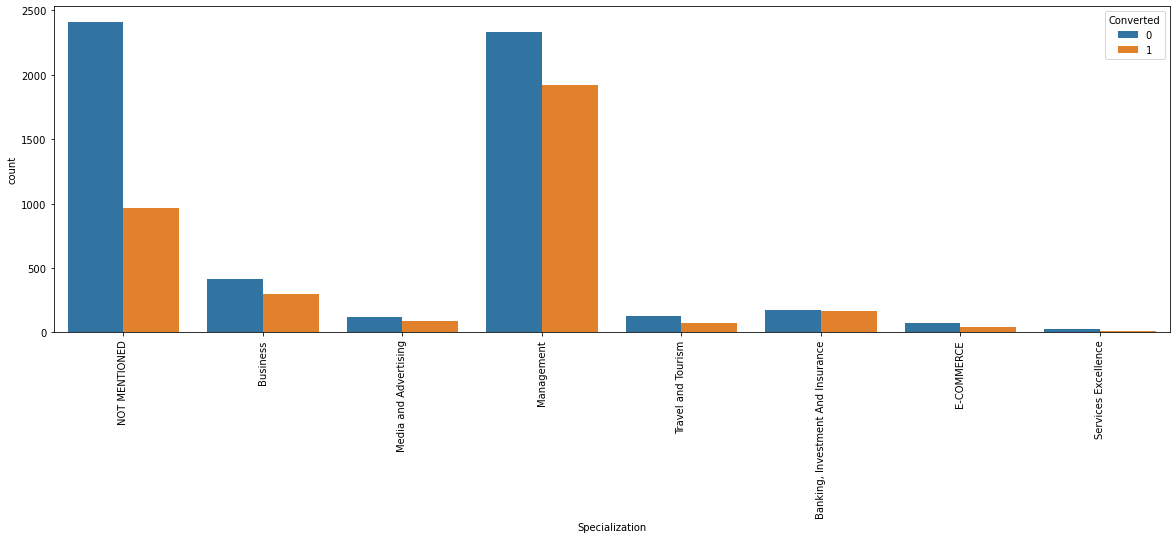

In [25]:
plt.figure(figsize=(20,6))
sns.countplot(lead['Specialization'] ,hue=lead['Converted'])
plt.xticks(rotation=90)

In [26]:
round(lead.isna().mean() * 100 ,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [27]:
# Analysing lead['What is your current occupation'] column
lead['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [28]:
# replacing the nan values with the mode value
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unemployed')

In [29]:
lead['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [30]:
# analysing lead['What matters most to you in choosing a course'] column
lead['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [31]:
## replacing the nan values with the mode value
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [32]:
lead['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [33]:
round(lead.isna().mean() * 100 ,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [34]:
# Analysing Tags Column
lead['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [35]:
# replacing null values with Not Mentioned
lead['Tags'] = lead['Tags'].replace(np.nan, 'Not Mentioned')

In [36]:
# less value counts tags will replace with other Tags
lead['Tags']=lead['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off','Already a student','Not doing further education',
                                    'invalid number','wrong number given','Interested  in full time MBA'], 'other tags')

In [37]:
lead['Tags'].value_counts(dropna=False)

Not Mentioned                          3353
Will revert after reading the email    2072
other tags                             1380
Ringing                                1203
Interested in other courses             513
Closed by Horizzon                      358
Busy                                    186
Lost to EINS                            175
Name: Tags, dtype: int64

In [38]:
round((lead.isna().mean() * 100), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [39]:
# analysing City column
lead['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

**City column having max nan values and as view city doesn't matter to study, cause dropping city column**

In [40]:
lead.drop(['City'], axis = 1, inplace = True) # dropping city column

In [41]:
round((lead.isna().mean() * 100), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [42]:
# dropping remaining nan values
lead.dropna(inplace=True)

In [43]:
# Checking the number of unique categories in each categorical columns and replacing with other category
lead['Lead Source'].value_counts(dropna = False)

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [44]:
lead['Lead Source'] = lead['Lead Source'].replace(['Others','bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM', 'google', 'Social Media','Live Chat'], 'Others')

In [45]:
lead['Lead Source'].value_counts(dropna = False)

Google              2868
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Facebook              31
Others                28
Name: Lead Source, dtype: int64

In [46]:
lead['Lead Origin'].value_counts(dropna = False)

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

In [47]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

In [48]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NOT MENTIONED,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,NOT MENTIONED,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,NOT MENTIONED,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,No,No,Modified


In [49]:
# Checking columns before dropping them.
# i.e Dropping columns are not having satisfactory data
lead=lead.drop(['What matters most to you in choosing a course', 
                 'Do Not Call','Search','Magazine',
                 'Newspaper Article',
                 'X Education Forums',
                 'Newspaper',
                 'Digital Advertisement',
                 'Through Recommendations',
                 'Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content',
                 'I agree to pay the amount through cheque'],axis=1)

In [50]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NOT MENTIONED,Unemployed,Interested in other courses,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,NOT MENTIONED,Unemployed,Ringing,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business,Student,Will revert after reading the email,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,NOT MENTIONED,Unemployed,Will revert after reading the email,No,Modified


In [51]:
lead.shape

(9074, 15)

In [52]:
# After Cleaning Data, 98% data preserved
print(round((len(lead.index)/9240)*100, 2)) # No loss of data

98.2


In [53]:
# Finding Outliers and treating them
lead.describe(percentiles=[.25, .50, .75, .90, .95, .99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
90%,650276.800000,1.000000,7.000000,1373.000000,5.000000
95%,655344.450000,1.000000,10.000000,1557.000000,6.000000
99%,659563.350000,1.000000,17.000000,1839.000000,9.000000


no such Outliers exist in the dataframe

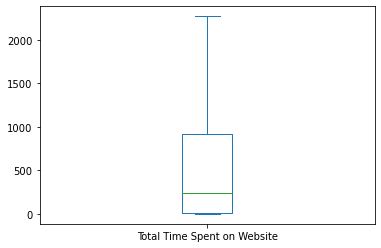

In [54]:
lead['Total Time Spent on Website'].plot.box()
plt.show()

## Step 3 : Data Analysis


In [55]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NOT MENTIONED,Unemployed,Interested in other courses,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,NOT MENTIONED,Unemployed,Ringing,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business,Student,Will revert after reading the email,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,NOT MENTIONED,Unemployed,Will revert after reading the email,No,Modified


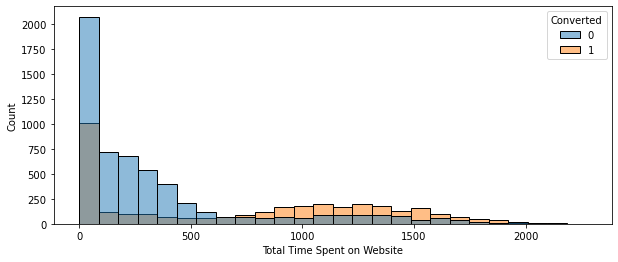

In [56]:
plt.figure(figsize=[10,4])
sns.histplot(data = lead, x="Total Time Spent on Website",hue="Converted" )
plt.show()

from the above plot we can see Higher time spent on the website is more chances of getting converted 

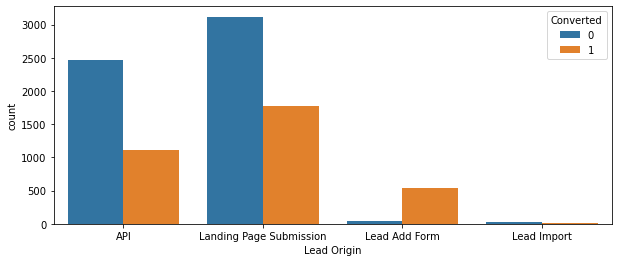

In [57]:
plt.figure(figsize=[10,4])
sns.countplot(lead["Lead Origin"],hue=lead["Converted"] )
plt.show()

from the above figure : The origin identifier with which the customer was identified to be a lead is getting from landing page submission prioritized 


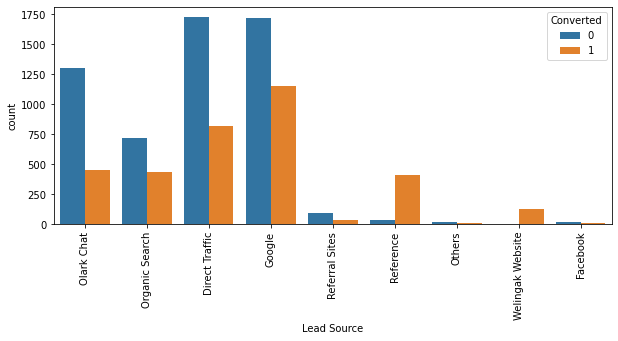

In [58]:
plt.figure(figsize=[10,4])
sns.countplot(lead["Lead Source"],hue=lead["Converted"])
plt.xticks(rotation=90)
plt.show()

google source lead are converting more as we can see in the lead source followed by Direct Traffic

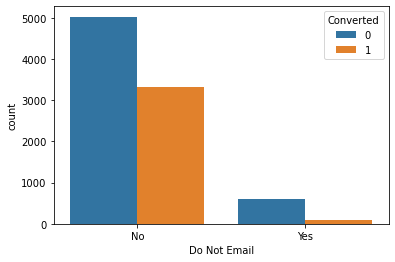

In [59]:
sns.countplot(lead["Do Not Email"],hue=lead["Converted"])
plt.show()

the customer wherein they select whether of not they want to be emailed about the course or not preferabely No customers are getting converged

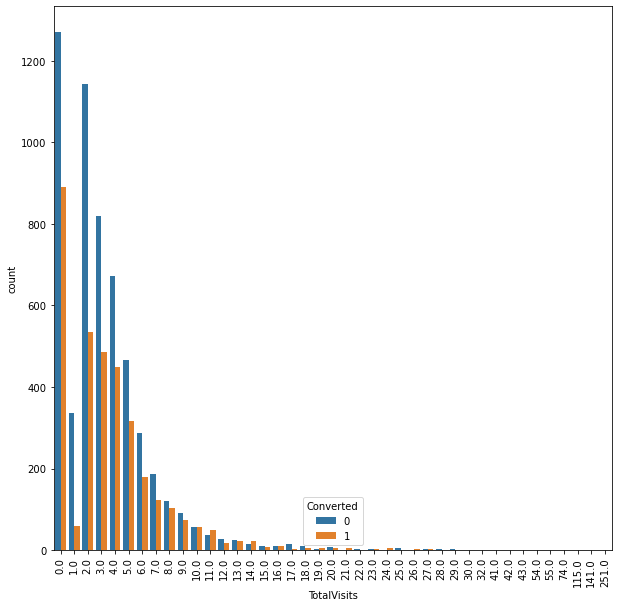

In [60]:
plt.figure(figsize=[10,10])
sns.countplot(lead["TotalVisits"],hue=lead["Converted"])
plt.xticks(rotation=90)
plt.show()

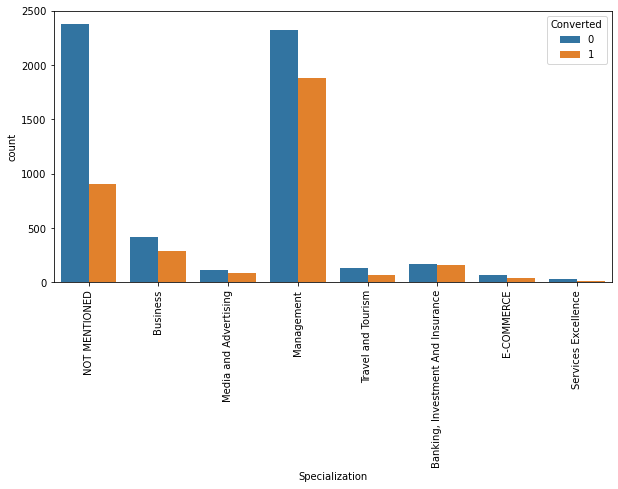

In [61]:
plt.figure(figsize=[10,5])
sns.countplot(lead["Specialization"],hue=lead["Converted"])
plt.xticks(rotation=90)
plt.show() 

the customer selected specialization option while filling the form is the customer worked before in the management roles

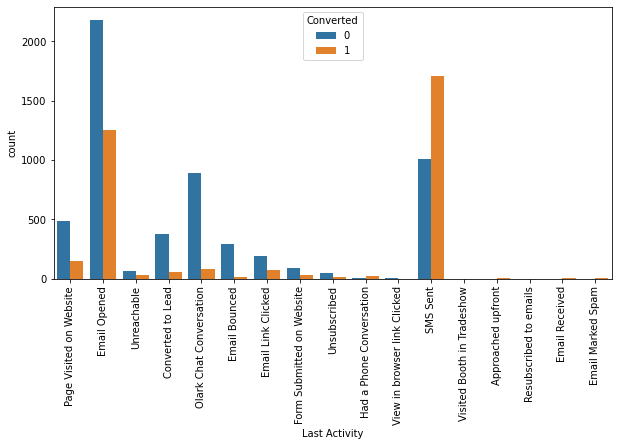

In [62]:
plt.figure(figsize=[10,5])
sns.countplot(lead["Last Activity"],hue=lead["Converted"])
plt.xticks(rotation=90)
plt.show()

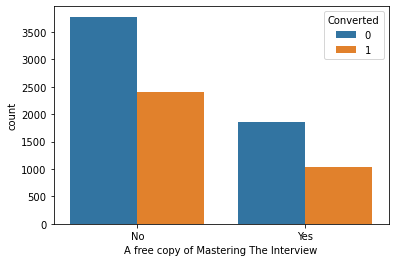

In [63]:
sns.countplot(lead["A free copy of Mastering The Interview"],hue=lead["Converted"])
plt.show()

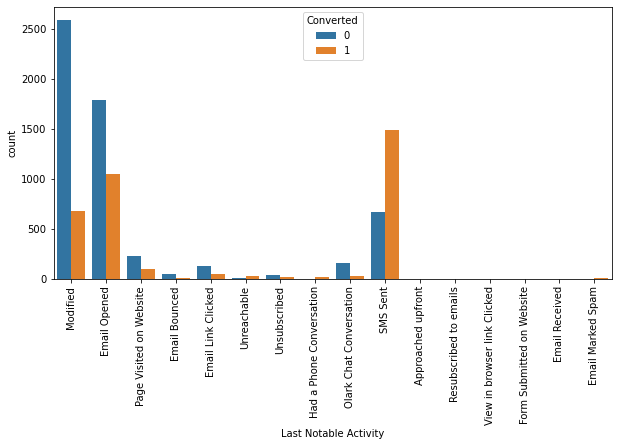

In [64]:
plt.figure(figsize=[10,5])
sns.countplot(lead["Last Notable Activity"],hue=lead["Converted"])
plt.xticks(rotation = 90)
plt.show()

### Inference :
**As we can see in the above Analysis From columns we can understand about the successfully converted leads and unsuccessful converted leads** 

## Step 4 : Data Preparation 

In [65]:
lead.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NOT MENTIONED,Unemployed,Interested in other courses,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,NOT MENTIONED,Unemployed,Ringing,No,Email Opened


In [66]:
lead.shape

(9074, 15)

In [67]:
lead1 = lead[:] # Dropping transfering data

In [68]:
# Dropping columns "Lead Number","Prospect ID" in dataframe cause they are used for backend process
lead1.drop(columns = ["Lead Number","Prospect ID"], inplace = True)

In [69]:
lead1.columns 

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

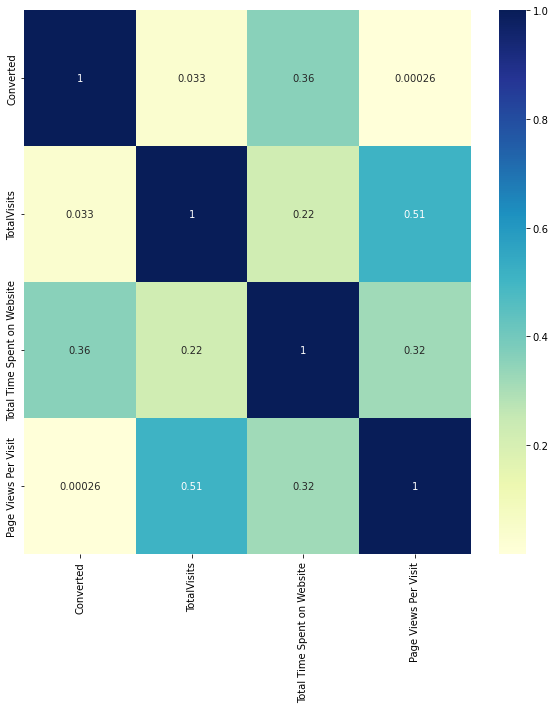

In [70]:
# finding correlation
plt.figure(figsize=[10,10])
sns.heatmap(data = lead1.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [71]:
lead1.select_dtypes(include=['object']).columns 

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [72]:
# Getting Dummies of categorical variables
lead_dummy = pd.get_dummies(lead1[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity']])

In [73]:
lead_dummy.shape

(9074, 72)

In [74]:
# Concatinating lead1 and lead_dummy dataframes
lead2 = pd.concat([lead1, lead_dummy], axis = 1)

In [75]:
lead2.shape

(9074, 85)

In [76]:
# categorical variables 
cat = lead2[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity']]

In [77]:
# dropping categorcal variables
lead2.drop(cat, 1, inplace=True)

In [78]:
lead2.shape

(9074, 76)

In [79]:
lead2.head(2)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_No,Do Not Email_Yes,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business,Specialization_E-COMMERCE,Specialization_Management,Specialization_Media and Advertising,Specialization_NOT MENTIONED,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Mentioned,Tags_Ringing,Tags_Will revert after reading the email,Tags_other tags,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## Correlation : Finding the correlation between the Variables

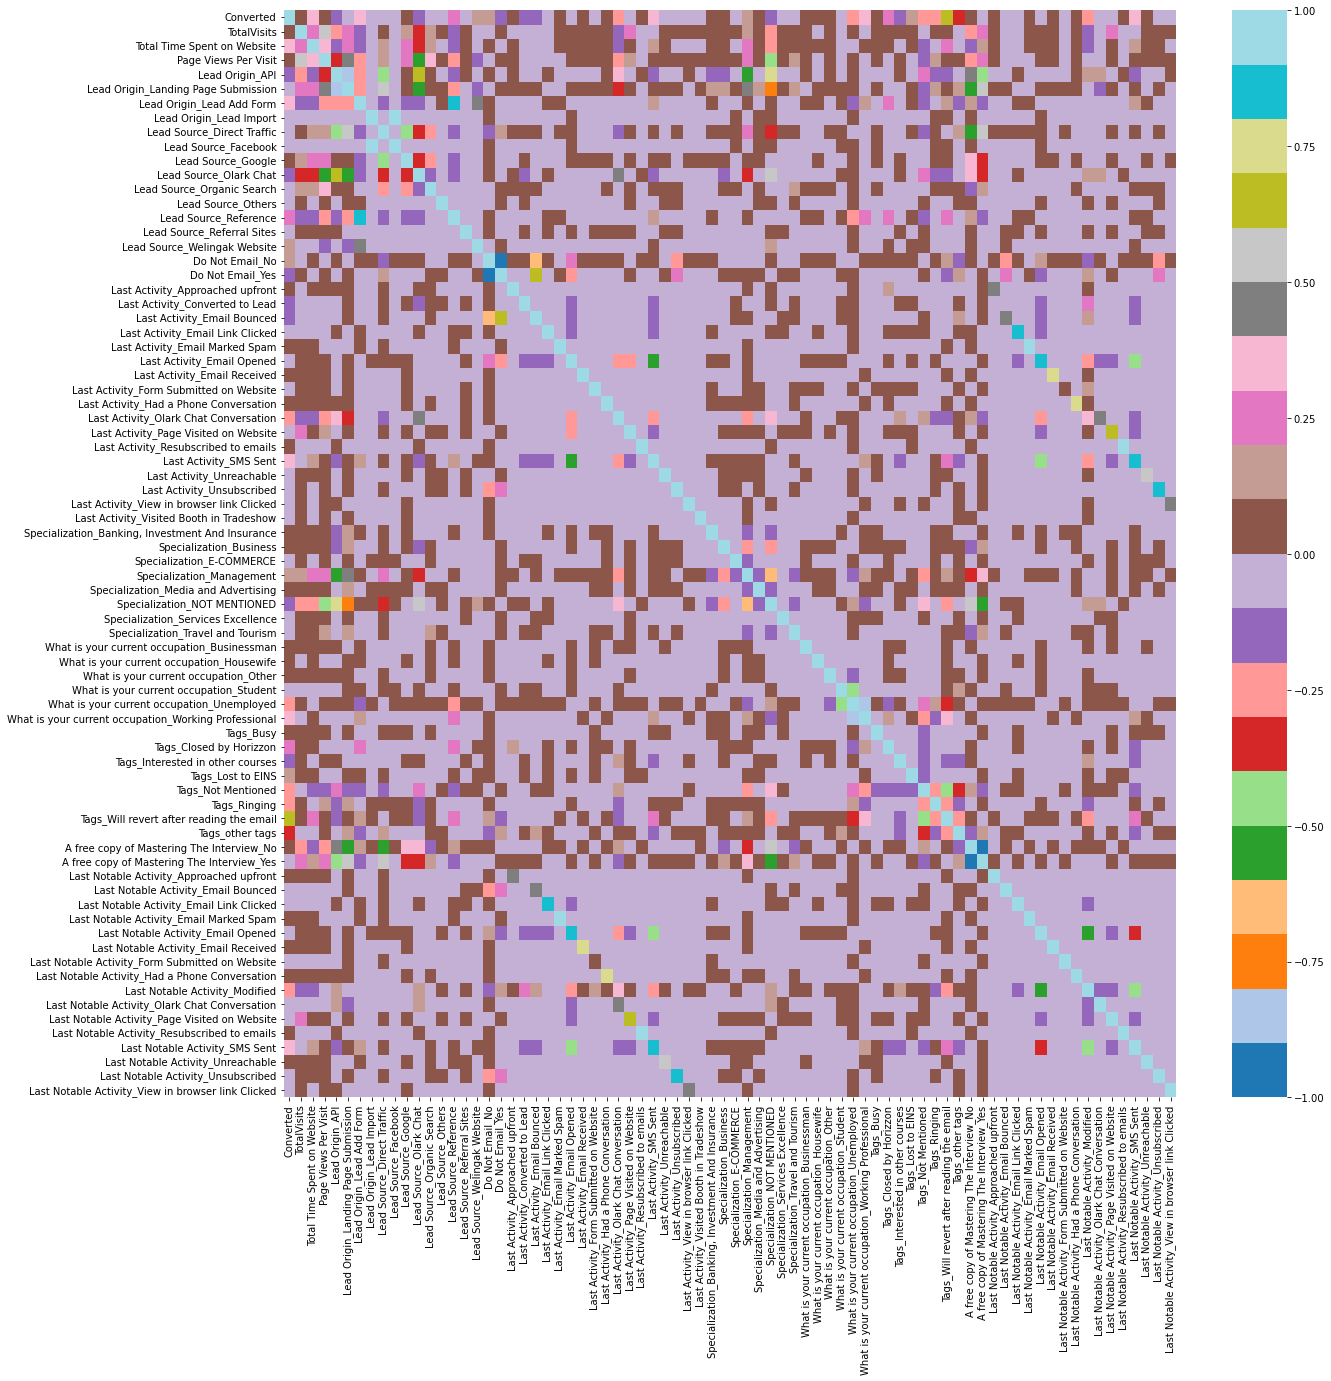

In [80]:
plt.figure(figsize=[20,20])
sns.heatmap(data = lead2.corr(), cmap="tab20")
plt.show()

#### inference
**as we can see in above heatmap less variables are correlated with each other**

## Test   Train   Split

In [81]:
# importing Required Library
from sklearn.model_selection import train_test_split

In [82]:
# initialization of X Variables
X= lead2.drop('Converted',axis=1)

In [83]:
# initialization of y Variables
y = lead2["Converted"]

In [84]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

## Standardisation Scalling

In [85]:
# importing required library
from sklearn.preprocessing import StandardScaler

In [86]:
scaler = StandardScaler()

In [87]:
# scalling numeric variables
X_train[["TotalVisits",
         "Total Time Spent on Website",
         "Page Views Per Visit"]] = scaler.fit_transform(X_train[["TotalVisits",
                                                                  "Total Time Spent on Website",
                                                                  "Page Views Per Visit"]])

In [88]:
X_train.shape

(6351, 75)

In [89]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_No,Do Not Email_Yes,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business,Specialization_E-COMMERCE,Specialization_Management,Specialization_Media and Advertising,Specialization_NOT MENTIONED,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Mentioned,Tags_Ringing,Tags_Will revert after reading the email,Tags_other tags,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,-0.284595,-0.160255,-0.179666,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,-0.284595,-0.540048,-0.179666,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,-0.671384,-0.888650,-1.132538,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,-0.284595,1.643304,-0.179666,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0.295588,2.017593,0.058552,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


 ## Step 5 : Data Modelling

In [90]:
# importing libraries
import statsmodels.api as sm

In [91]:
# adding constant var
model = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())

In [92]:
#model has been fit on train data
res = model.fit()

In [93]:
# results of the fitting
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6286
Model Family:                Binomial   Df Model:                           64
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 10 May 2022   Deviance:                       46789.
Time:                        17:04:03   Pearson chi2:                 2.29e+18
No. Iterations:                    27                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 1.016e+26   1.22e+20   8.36e+05      0.000    1.02e+26    1.02e+26
TotalVisits                                           9.013e+13   1.02e+06   8.82e+07      0.000    9.01e+13    9.01e+13
Total Time Spent on Website                           4.716e+14   1.04e+06   4.54e+08      0.000    4.72e+14    4.72e+14
Page Views Per Visit                                 -4.547e+13   1.26e+06  -3.61e+07      0.000   -4.55e+13   -4.55e+13
Lead Origin_API                                       3.668e+26    1.4e+20   2.63e+06      0.000    3.67e+26    3.67e+26
Lead Origin_Landing Page Submission                   3.668e+26    1.4e+20   2.63e+06      0.000    3.67e+26    3.67e+26
Lead Origin_Lead Add Form                             3.668e+26    1.4e+20   2.63e+06      0.000    3.67e+26    3.67e+26
Lead Origin_Lead Import                               3.668e+26    1.4e+20   2.63e+06      0.000    3.67e+26    3.67e+26
Lead Source_Direct Traffic                            1.729e+25   1.44e+19    1.2e+06      0.000    1.73e+25    1.73e+25
Lead Source_Facebook                                  1.729e+25   1.44e+19    1.2e+06      0.000    1.73e+25    1.73e+25
Lead Source_Google                                    1.729e+25   1.44e+19    1.2e+06      0.000    1.73e+25    1.73e+25
Lead Source_Olark Chat                                1.729e+25   1.44e+19    1.2e+06      0.000    1.73e+25    1.73e+25
Lead Source_Organic Search                            1.729e+25   1.44e+19    1.2e+06      0.000    1.73e+25    1.73e+25
Lead Source_Others                                    1.729e+25   1.44e+19    1.2e+06      0.000    1.73e+25    1.73e+25
Lead Source_Reference                                 1.729e+25   1.44e+19    1.2e+06      0.000    1.73e+25    1.73e+25
Lead Source_Referral Sites                            1.729e+25   1.44e+19    1.2e+06      0.000    1.73e+25    1.73e+25
Lead Source_Welingak Website                          1.729e+25   1.44e+19    1.2e+06      0.000    1.73e+25    1.73e+25
Do Not Email_No                                      -4.149e+26   1.39e+20  -2.99e+06      0.000   -4.15e+26   -4.15e+26
Do Not Email_Yes                                     -4.149e+26   1.39e+20  -2.99e+06      0.000   -4.15e+26   -4.15e+26
Last Activity_Approached upfront                      1.008e+25   7.85e+18   1.28e+06      0.000    1.01e+25    1.01e+25
Last Activity_Converted to Lead                       1.008e+25   7.85e+18   1.28e+06      0.000    1.01e+25    1.01e+25
Last Activity_Email Bounced                           1.008e+25   7.85e+18   1.28e+06      0.000    1.01e+25    1.01e+25
Last Activity_Email Link Clicked                      1.00

In [94]:
# importing libraries for RFE

from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE

In [95]:
log_reg = LogisticRegression()

In [96]:
rfe= RFE(log_reg,15)
rfe = rfe.fit(X_train, y_train)

In [97]:
# RFE support columns 
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 43),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 46),
 ('Lead Origin_API', False, 10),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 16),
 ('Lead Source_Direct Traffic', False, 24),
 ('Lead Source_Facebook', False, 22),
 ('Lead Source_Google', False, 26),
 ('Lead Source_Olark Chat', False, 2),
 ('Lead Source_Organic Search', False, 25),
 ('Lead Source_Others', False, 54),
 ('Lead Source_Reference', False, 21),
 ('Lead Source_Referral Sites', False, 23),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email_No', True, 1),
 ('Do Not Email_Yes', False, 11),
 ('Last Activity_Approached upfront', False, 44),
 ('Last Activity_Converted to Lead', False, 13),
 ('Last Activity_Email Bounced', False, 32),
 ('Last Activity_Email Link Clicked', False, 45),
 ('Last Activity_Email Marked Spam', False, 50),
 ('Last Activity_Email Opened', False, 41),
 ('Last 

In [98]:
# RFE selected columns
cols = X_train.columns[rfe.support_]

In [99]:
cols

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Do Not Email_No', 'Last Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_other tags',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [100]:
# Model1
model1 = sm.GLM(y_train,(sm.add_constant(X_train[cols])),family= sm.families.Binomial())
res1 = model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1170.9
Date:                Tue, 10 May 2022   Deviance:                       2341.8
Time:                        17:04:25   Pearson chi2:                 8.52e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.8776      0.285     -6.577      0.000      -2.437      -1.318
Total Time Spent on Website                       1.0298      0.058     17.860      0.000       0.917       1.143
Lead Origin_Landing Page Submission              -1.1655      0.122     -9.525      0.000      -1.405      -0.926
Lead Origin_Lead Add Form                         0.9775      0.468      2.090      0.037       0.061       1.894
Lead Source_Welingak Website                      3.7835      0.866      4.367      0.000       2.085       5.482
Do Not Email_No                                   1.1219      0.273      4.117      0.000       0.588       1.656
Last Activity_SMS Sent                            1.3588      0.237      5.728      0.000       0.894       1.824
Tags_Closed by Horizzon                           6.6769      0.735      9.078      0.000       5.235       8.118
Tags_Interested in other courses                 -1.9054      0.346     -5.506      0.000      -2.584      -1.227
Tags_Lost to EINS                                 6.1138      0.733      8.338      0.000       4.677       7.551
Tags_Ringing                                     -3.8303      0.265    -14.448      0.000      -4.350      -3.311
Tags_Will revert after reading the email          4.7927      0.205     23.429      0.000       4.392       5.194
Tags_other tags                                  -2.5278      0.223    -11.321      0.000      -2.965      -2.090
Last Notable Activity_Modified                   -1.4518      0.158     -9.172      0.000      -1.762      -1.142
Last Notable Activity_Olark Chat Conversation    -1.4937      0.424     -3.525      0.000      -2.324      -0.663
Last Notable Activity_SMS Sent                    1.0011      0.272      3.679      0.000       0.468       1.534
=================================================================================================================
"""

**from summary of model2 it's looking soo perfect and don't have any insignificant variable, to move further let's have a look on VIF factors and remove high VIF factors from model**

## Variance Inflation Factor

In [101]:
# importing required libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [102]:
VIF = pd.DataFrame({"Features" : cols})

In [103]:
VIF["VIF"] = [variance_inflation_factor(X_train[cols].values,i) for i in range(X_train[cols].shape[1])]

In [104]:
VIF.sort_values(ascending=False,inplace=True, by="VIF")

In [105]:
VIF

,Features,VIF
14,Last Notable Activity_SMS Sent,6.274611
5,Last Activity_SMS Sent,6.044918
4,Do Not Email_No,3.926211
1,Lead Origin_Landing Page Submission,2.371418
12,Last Notable Activity_Modified,2.055921
10,Tags_Will revert after reading the email,2.004072
2,Lead Origin_Lead Add Form,1.872141
9,Tags_Ringing,1.397705
11,Tags_other tags,1.393211
3,Lead Source_Welingak Website,1.365295


`"Last Notable Activity_SMS Sent"` column has highest VIF followed, so we will drop this column

In [106]:
cols = cols.drop("Last Notable Activity_SMS Sent")

In [107]:
# Model2
model2 = sm.GLM(y_train,(sm.add_constant(X_train[cols])),family= sm.families.Binomial())
res2 = model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1177.8
Date:                Tue, 10 May 2022   Deviance:                       2355.6
Time:                        17:04:26   Pearson chi2:                 8.48e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.7822      0.284     -6.279      0.000      -2.339      -1.226
Total Time Spent on Website                       1.0189      0.057     17.789      0.000       0.907       1.131
Lead Origin_Landing Page Submission              -1.1776      0.121     -9.739      0.000      -1.415      -0.941
Lead Origin_Lead Add Form                         0.9176      0.475      1.933      0.053      -0.013       1.848
Lead Source_Welingak Website                      3.7519      0.871      4.310      0.000       2.046       5.458
Do Not Email_No                                   1.1111      0.273      4.071      0.000       0.576       1.646
Last Activity_SMS Sent                            2.1112      0.120     17.603      0.000       1.876       2.346
Tags_Closed by Horizzon                           6.8955      0.737      9.359      0.000       5.451       8.340
Tags_Interested in other courses                 -1.8709      0.347     -5.390      0.000      -2.551      -1.191
Tags_Lost to EINS                                 6.2680      0.737      8.505      0.000       4.824       7.712
Tags_Ringing                                     -3.6987      0.259    -14.259      0.000      -4.207      -3.190
Tags_Will revert after reading the email          4.8771      0.208     23.427      0.000       4.469       5.285
Tags_other tags                                  -2.4596      0.220    -11.181      0.000      -2.891      -2.028
Last Notable Activity_Modified                   -1.8129      0.132    -13.730      0.000      -2.072      -1.554
Last Notable Activity_Olark Chat Conversation    -1.5787      0.423     -3.733      0.000      -2.408      -0.750
=================================================================================================================
"""

`"Lead Origin_Lead Add Form"` column showing greter than adjusted p-value i.e >=0.05, dropping this column 

In [108]:
cols = cols.drop("Lead Origin_Lead Add Form")

In [109]:
# Model3
model3 = sm.GLM(y_train,(sm.add_constant(X_train[cols])),family= sm.families.Binomial())
res3 = model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1179.7
Date:                Tue, 10 May 2022   Deviance:                       2359.5
Time:                        17:04:27   Pearson chi2:                 8.42e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.7422      0.282     -6.183      0.000      -2.294      -1.190
Total Time Spent on Website                       1.0114      0.057     17.664      0.000       0.899       1.124
Lead Origin_Landing Page Submission              -1.2123      0.120    -10.118      0.000      -1.447      -0.977
Lead Source_Welingak Website                      4.6414      0.739      6.281      0.000       3.193       6.090
Do Not Email_No                                   1.0885      0.271      4.012      0.000       0.557       1.620
Last Activity_SMS Sent                            2.1268      0.120     17.776      0.000       1.892       2.361
Tags_Closed by Horizzon                           7.1977      0.726      9.919      0.000       5.775       8.620
Tags_Interested in other courses                 -1.8670      0.348     -5.370      0.000      -2.548      -1.186
Tags_Lost to EINS                                 6.3194      0.736      8.586      0.000       4.877       7.762
Tags_Ringing                                     -3.6654      0.259    -14.171      0.000      -4.172      -3.158
Tags_Will revert after reading the email          4.9616      0.204     24.315      0.000       4.562       5.362
Tags_other tags                                  -2.4448      0.220    -11.118      0.000      -2.876      -2.014
Last Notable Activity_Modified                   -1.8295      0.132    -13.865      0.000      -2.088      -1.571
Last Notable Activity_Olark Chat Conversation    -1.5957      0.423     -3.773      0.000      -2.425      -0.767
=================================================================================================================
"""

In [110]:
VIF2 = pd.DataFrame({"Features" : cols})
VIF2["VIF"] = [variance_inflation_factor(X_train[cols].values,i) for i in range(X_train[cols].shape[1])]
VIF2.sort_values(ascending=False,inplace=True, by="VIF")
VIF2

,Features,VIF
3,Do Not Email_No,3.814457
1,Lead Origin_Landing Page Submission,2.254512
9,Tags_Will revert after reading the email,1.789482
11,Last Notable Activity_Modified,1.653185
4,Last Activity_SMS Sent,1.603307
8,Tags_Ringing,1.388231
10,Tags_other tags,1.382188
0,Total Time Spent on Website,1.192955
6,Tags_Interested in other courses,1.191863
5,Tags_Closed by Horizzon,1.108724


`VIF` of all columns below <=4, so looks good

### Predictions

In [111]:
# getting the Predicted Values on the train set
y_train_pred = pd.DataFrame({"Actual" : y_train})

In [112]:
y_train_pred["Predicted"] = res3.predict(sm.add_constant(X_train[cols]))

In [113]:
y_train_pred.head()

,Actual,Predicted
3009,0,0.116285
1012,0,0.029292
9226,0,0.007242
4750,1,0.872456
7987,1,0.998878


## Plotting ROC Curve 

In [114]:
# Importing necessary libraries for roc curve

from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score

In [115]:
def edu_roc( real, probability ):
    
    FPR, TPR, thresholds = roc_curve( real, probability, drop_intermediate = False )   
    
    auc_score = roc_auc_score( real, probability )    
    
    plt.figure(figsize=(8, 4))
    
    plt.plot( FPR, TPR, label='ROC curve (area = %0.2f)' % auc_score )
    
    plt.plot([0, 1], [0, 1], 'r--')
    
    plt.xlim([0.0, 1.0])
    
    plt.ylim([0.0, 1.05])
    
    plt.xlabel('False Positive Rate')
    
    plt.ylabel('True Positive Rate')
    
    plt.title('ROC Curve')
    
    plt.show()

    return None 

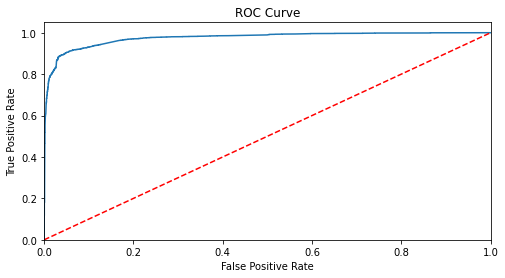

In [116]:

edu_roc(y_train_pred['Actual'], y_train_pred['Predicted'])

### inference
1. This curve is look great and it is closer to the left side of the border hence our model is having great accuracy.
2. The area under the curve is 95% of the total area.

In [117]:
# taking probabilities for threshold values

threshold = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for x in threshold:
      y_train_pred[x] = y_train_pred.Predicted.map(lambda y: 1 if y>x else 0)

y_train_pred.head()

,Actual,Predicted,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3009,0,0.116285,1,0,0,0,0,0,0,0,0
1012,0,0.029292,0,0,0,0,0,0,0,0,0
9226,0,0.007242,0,0,0,0,0,0,0,0,0
4750,1,0.872456,1,1,1,1,1,1,1,1,0
7987,1,0.998878,1,1,1,1,1,1,1,1,1


In [118]:
# importing libraries for metrics
import sklearn.metrics as metrics

In [119]:
# Sensitivity: (TP)/( TP + FN)
# Accuracy : (TN + TP)/Total
# Specificity : TN / (TN + FP)

# arranging accuracy, specificity and sensitivity of all thresholds in a dataframe 

data = pd.DataFrame({"Threshold" : threshold}, columns= ["Accuracy","Sensitivity","Specificity"])

for y in threshold:
    matrix = metrics.confusion_matrix(y_train_pred.Actual,y_train_pred[y])
    accuracy = (matrix[1,1] + matrix[0,0])/ (matrix.sum())
    sensitivity = (matrix[1,1])/(matrix[1,1] + matrix[1,0])
    specificity = (matrix[0,0])/(matrix[0,0] + matrix[0,1])

    data.loc[y] = [accuracy,sensitivity,specificity]

In [120]:
data

,Accuracy,Sensitivity,Specificity
0.1,0.854826,0.973017,0.780794
0.2,0.905212,0.938675,0.884251
0.3,0.923634,0.919052,0.926504
0.4,0.932137,0.904742,0.949296
0.5,0.935128,0.888798,0.964149
0.6,0.931664,0.870809,0.969782
0.7,0.917178,0.818888,0.978745
0.8,0.911825,0.793132,0.986172
0.9,0.898599,0.751022,0.991037


<Figure size 2160x1440 with 0 Axes>

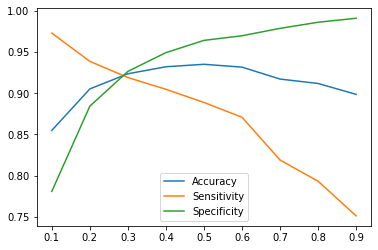

In [121]:
plt.figure(figsize = [30,20])
data.plot()
plt.show()

In [122]:
# Recall: (TP)/( TP + FN)
# Precision : TP/(TP + FP)

data2 = pd.DataFrame({"Threshold" : threshold}, columns= ["Recall","Precision"])

for y in threshold:
    
    matrix = metrics.confusion_matrix(y_train_pred.Actual,y_train_pred[y])
    recall = (matrix[1,1])/(matrix[1,1] + matrix[1,0])
    precision = (matrix[1,1])/(matrix[1,1] + matrix[0,1])

    data2.loc[y] = [recall,precision]

<Figure size 1440x1440 with 0 Axes>

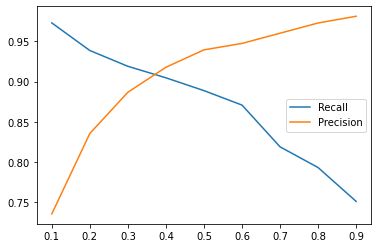

In [123]:
plt.figure(figsize = [20,20])
data2.plot()
plt.show()

In [124]:
y_train_pred["Final"] = y_train_pred[0.4]

In [125]:
y_train_pred.head()

,Actual,Predicted,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final
3009,0,0.116285,1,0,0,0,0,0,0,0,0,0
1012,0,0.029292,0,0,0,0,0,0,0,0,0,0
9226,0,0.007242,0,0,0,0,0,0,0,0,0,0
4750,1,0.872456,1,1,1,1,1,1,1,1,0,1
7987,1,0.998878,1,1,1,1,1,1,1,1,1,1


### Predicting for Test Data

In [126]:
X_test[["TotalVisits",
        "Total Time Spent on Website",
        "Page Views Per Visit"]] = scaler.transform(X_test[["TotalVisits",
                                                        "Total Time Spent on Website",
                                                        "Page Views Per Visit"]])

In [127]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_No,Do Not Email_Yes,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business,Specialization_E-COMMERCE,Specialization_Management,Specialization_Media and Advertising,Specialization_NOT MENTIONED,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Mentioned,Tags_Ringing,Tags_Will revert after reading the email,Tags_other tags,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,0.102194,-0.600595,0.773206,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1490,0.295588,1.887326,1.249642,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7936,-0.284595,-0.752879,-0.179666,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4216,-0.671384,-0.888650,-1.132538,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3830,0.875771,-0.587751,2.678951,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [128]:
y_test_pred = pd.DataFrame({"Actual Values": y_test})

In [129]:
y_pred = res3.predict(sm.add_constant((X_test[cols])))
y_test_pred["Predicted_Prob"] = y_pred
y_test_pred["Predicted"] = y_test_pred["Predicted_Prob"].map(lambda x: 1 if x>0.4 else 0)
y_test_pred.head(10)

,Actual Values,Predicted_Prob,Predicted
3271,0,0.220768,0
1490,1,0.993337,1
7936,0,0.195412,0
4216,1,0.978453,1
3830,0,0.078676,0
1800,1,0.911962,1
6507,0,0.016889,0
4821,0,0.019002,0
4223,1,0.996073,1
4714,0,0.221798,0


## Step 6 : Model Evaluation

In [130]:
# Accuracy Score
metrics.accuracy_score(y_test_pred["Actual Values"],y_test_pred["Predicted"])

0.9181050312155711

In [131]:
# Precision Score
metrics.precision_score(y_test_pred["Actual Values"],y_test_pred["Predicted"])

0.8908163265306123

In [132]:
# Recall
metrics.recall_score(y_test_pred["Actual Values"],y_test_pred["Predicted"])

0.8827098078867543

In [133]:
# complete report
print(metrics.classification_report(y_test_pred["Actual Values"],y_test_pred["Predicted"]))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1734
           1       0.89      0.88      0.89       989

    accuracy                           0.92      2723
   macro avg       0.91      0.91      0.91      2723
weighted avg       0.92      0.92      0.92      2723



## Assigning Lead score 

In [134]:
y_test_pred['Lead Score']=y_test_pred['Predicted_Prob'].apply(lambda x:round(x*100))

y_test_pred.head(5)

,Actual Values,Predicted_Prob,Predicted,Lead Score
3271,0,0.220768,0,22
1490,1,0.993337,1,99
7936,0,0.195412,0,20
4216,1,0.978453,1,98
3830,0,0.078676,0,8
